# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Habiba El Samman

ID:

Tutorial:t-9

---

Name:Mennatallah Khaled

ID:52-2334

Tutorial:T-9

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-46-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
rows, columns = df.shape
print('The dataframe has {} rows and {} columns'.format(rows, columns))

The dataframe has 46578 rows and 16 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  int64  
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 5.7+ MB


In [ ]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
df.describe(include='object')

,make,model,trim,body,transmission,vin,state,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578
unique,48,648,1097,71,2,46578,34,39460,20,17,4686,1021,953,2286
top,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,7871,1610,4851,17171,44928,1,7451,86,9156,20734,1733,168,397,490


In [ ]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,the hertz corporation,$11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,award auto sales and leasing inc,$28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,lexus financial services,$22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,peddle llc,$3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,u-haul,$22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
def is_specific_value(dframe, value_to_check):
    return df == value_to_check
result = is_specific_value(df, '—').sum(axis=0)
result

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color           2246
interior         988
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

this means there is 2246 missing value in color and 988 missing value in interior

In [ ]:
corr = df.corr()
corr

<ipython-input-54-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,year,condition
year,1.000000,0.549158
condition,0.549158,1.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['state']=df['state'].str.upper()
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
temp1=df['interior'].mode()
temp1


0    black
Name: interior, dtype: object

In [ ]:
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)',expand=False)
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0mi,black,gray,the hertz corporation,$11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0mi,silver,black,lexus financial services,$22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0mi,black,black,peddle llc,$3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0mi,white,gray,u-haul,$22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df['sellingprice'] = df['sellingprice'].astype(int)

In [ ]:
df['odometer'] = df['odometer'].str.extract('(\d+)',expand=False)
df['odometer'] = df['odometer'].astype(int)
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,the hertz corporation,$11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,award auto sales and leasing inc,$28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,lexus financial services,$22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,peddle llc,$3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,u-haul,$22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df['mmr'] = df['mmr'].str.extract('(\d+)',expand=False)
df['mmr'] = df['mmr'].astype(int)
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot: xlabel='color', ylabel='count'>

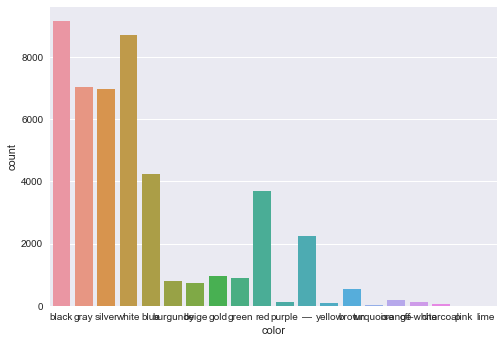

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

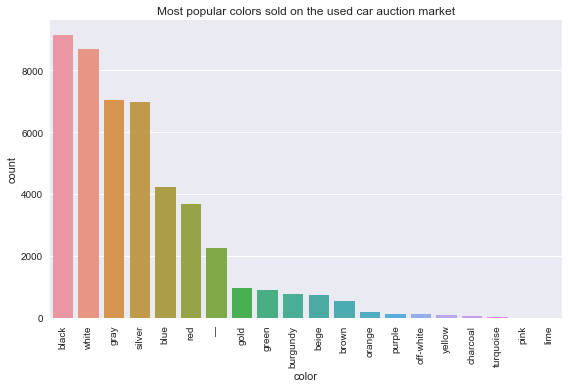

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

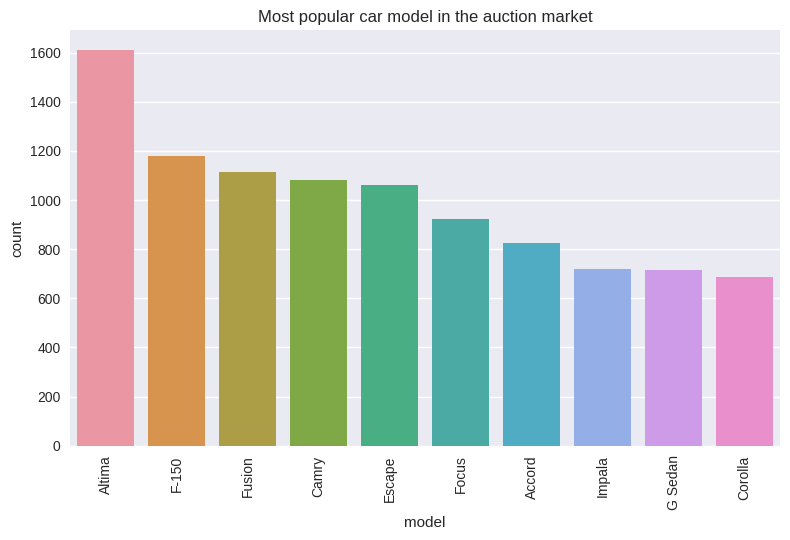

In [ ]:
popular_models= df.groupby('model').size().sort_values(ascending=False).head(10)
sns.countplot(x='model', data=df, order=popular_models.index).set(title='Most popular car model in the auction market')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
popular_models= df.groupby('model').size().sort_values(ascending=False).head(10)
popular_models

model
Altima     1610
F-150      1179
Fusion     1115
Camry      1081
Escape     1063
Focus       921
Accord      823
Impala      721
G Sedan     717
Corolla     685
dtype: int64

**Answer for Q1**: Your answer here

the most popular car model in the aution is "Altima" with 1610 car, followed by "F-150" with 1179 car, and the third one is Fusion with 1115 car.

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

<Axes: xlabel='transmission', ylabel='sellingprice'>

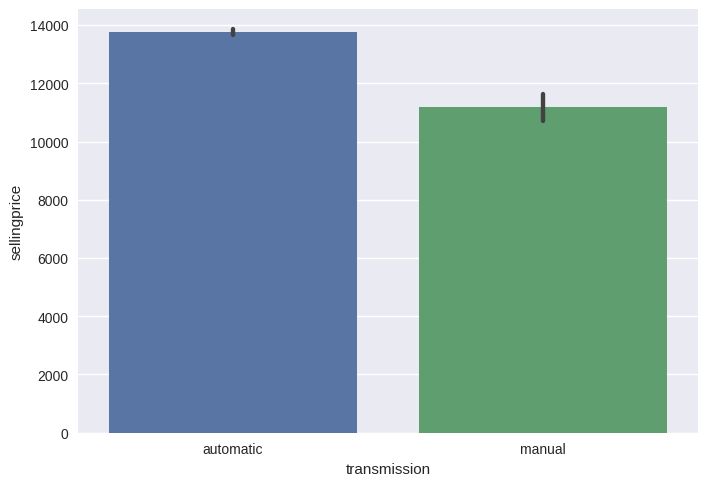

In [ ]:
sns.barplot(df, x="transmission", y="sellingprice")

<Axes: xlabel='transmission', ylabel='sellingprice'>

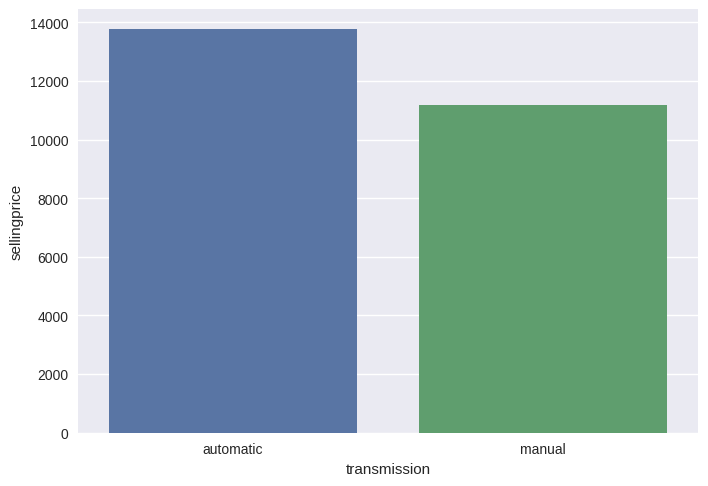

In [ ]:
sns.barplot(df, x="transmission", y="sellingprice", estimator="mean", errorbar=None)

**Answer for Q2**: Your answer here

yes, automatic cars sell for higher price than manual cars. automatic car price is $13761.075476 on average, while manual car price is $11181.775758 on average

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

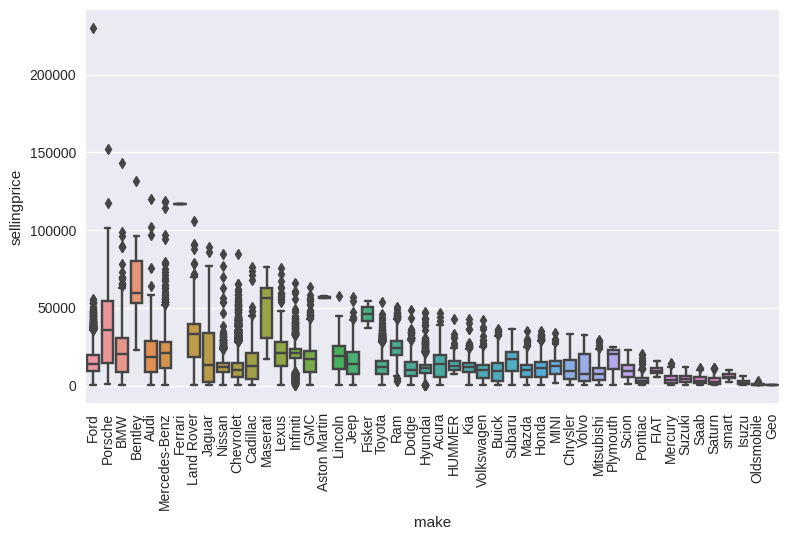

In [ ]:
sns.boxplot(x='make', y='sellingprice', data=df.sort_values(by='sellingprice', ascending=False));
plt.xticks(rotation=90)
plt.tight_layout()

the most expensive cars are Ford with $230000. Next one is Porsche with 152000. Based on the minimum and maximum values, car make that has the widest distribution is Porsche followed by Jaguar.

In [ ]:
df[['make','sellingprice']].sort_values(by='sellingprice', ascending=False).head(2)

,make,sellingprice
18134,Ford,230000
35140,Porsche,152000


**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
corr=df[['sellingprice','odometer']].corr()
corr

sellingprice    1.0000
odometer       -0.5809
Name: sellingprice, dtype: float64

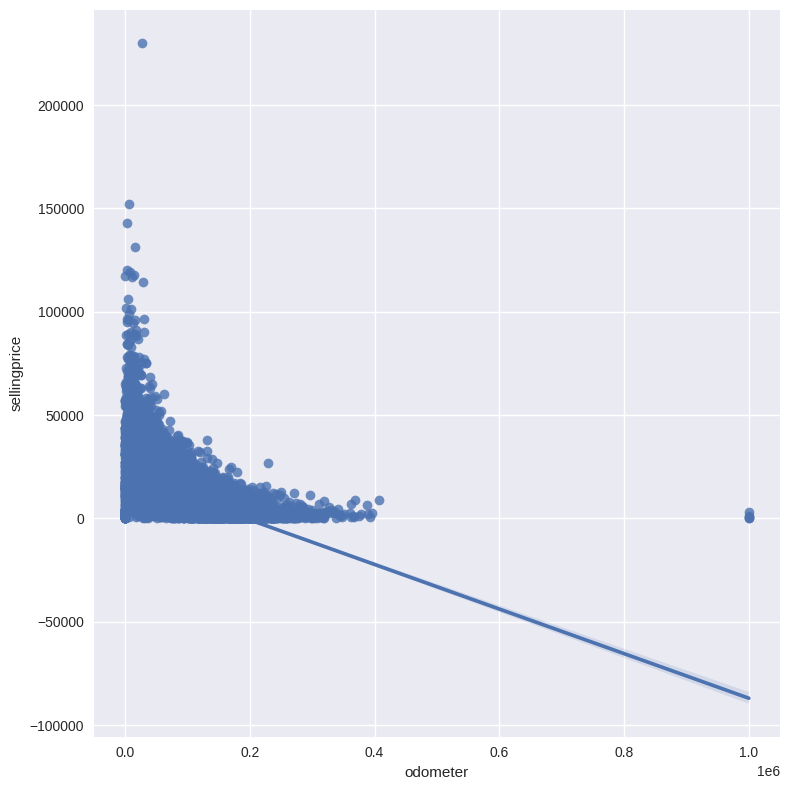

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8);

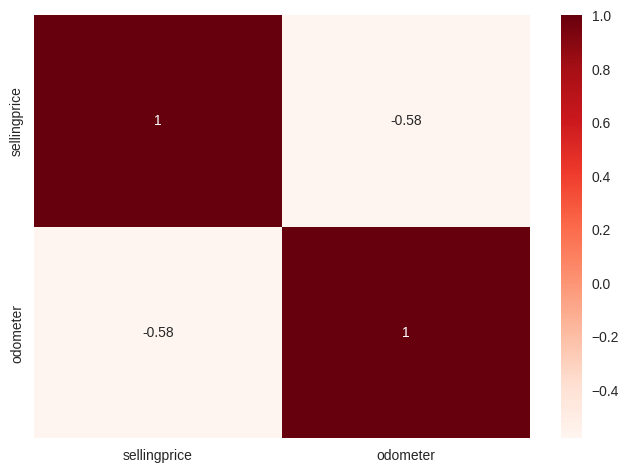

In [ ]:
sns.heatmap(corr, annot=True, cmap='Reds');

**Answer for Q4**: Your answer here

selling price and odometer are negatively correlated which means when odometer gets higher, selling price gets lower. and it appears in the best fit line that it's a downward sloping curve

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

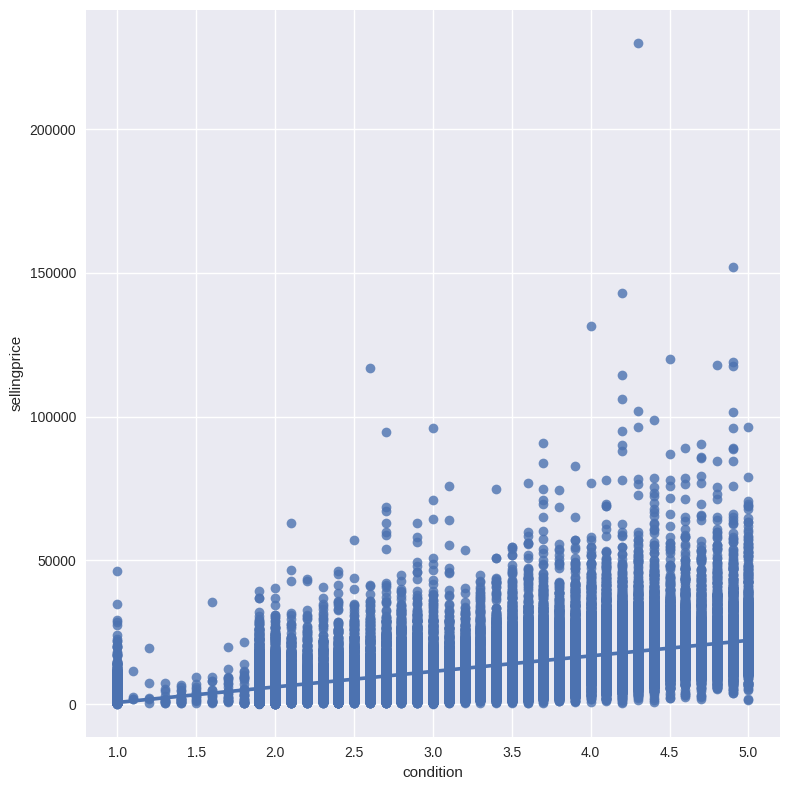

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8);

In [ ]:
corr=df[['sellingprice','condition']].corr()
corr

,sellingprice,condition
sellingprice,1.000000,0.529141
condition,0.529141,1.000000


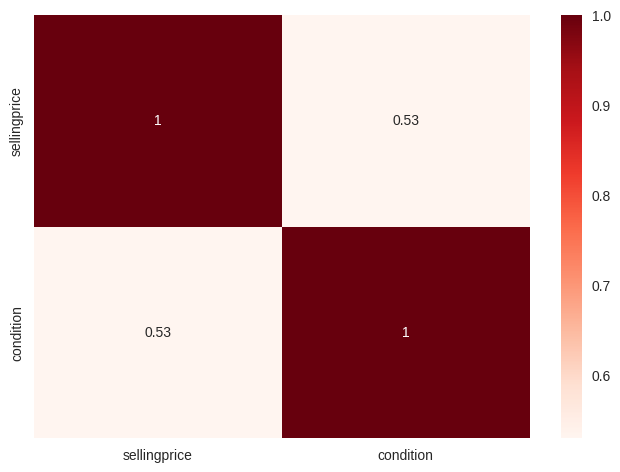

In [ ]:
sns.heatmap(corr, annot=True, cmap='Reds');

**Answer for Q5**: unlike the odometer, selling price and condition are positively correlated which means that if the condition is higher (better), the selling price gets higher as well. the best fit line is upward sloping

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

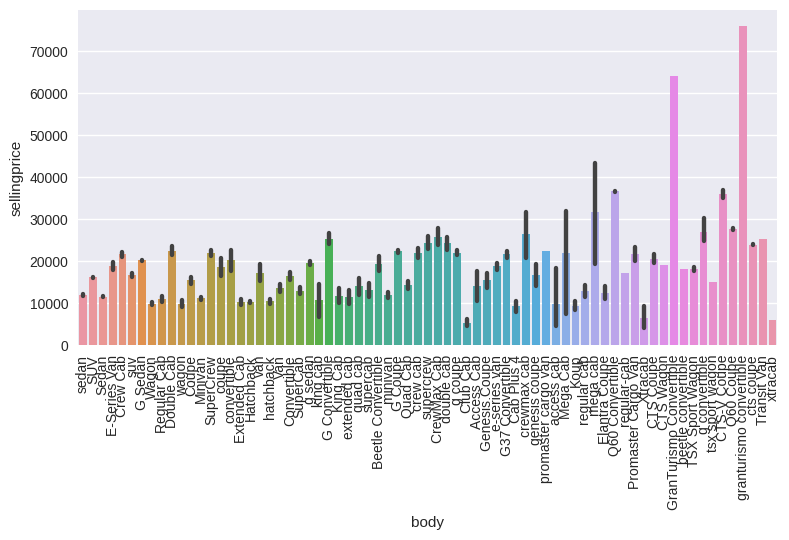

In [ ]:
sns.barplot(df, x="body", y="sellingprice")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
temp=df[['sellingprice','body']].groupby('body').agg('mean').sort_values('sellingprice', ascending=False)
temp

,sellingprice
body,
granturismo convertible,76000.000000
GranTurismo Convertible,64000.000000
Q60 Convertible,36600.000000
CTS-V Coupe,36000.000000
mega cab,31700.000000
...,...
Koup,9429.166667
Cab Plus 4,9250.000000
Xtracab,6500.000000


**Answer for Q6**: yes, the body type affect the price and the most expensive body type is granturismo convertible, and the least expensive one is club cab

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  int64  
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 5.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
make_le = LabelEncoder()
df_encoded['make'] = make_le.fit_transform(df['make'])
model_le = LabelEncoder()
df_encoded['model'] = model_le.fit_transform(df['model'])
trim_le = LabelEncoder()
df_encoded['trim'] = trim_le.fit_transform(df['trim'])
body_le = LabelEncoder()
df_encoded['body'] = body_le.fit_transform(df['body'])
transmission_le = LabelEncoder()
df_encoded['transmission'] = transmission_le.fit_transform(df['transmission'])
color_le = LabelEncoder()
df_encoded['color'] = color_le.fit_transform(df['color'])
interior_le = LabelEncoder()
df_encoded['interior'] = interior_le.fit_transform(df['interior'])
seller_le = LabelEncoder()
df_encoded['seller'] = seller_le.fit_transform(df['seller'])

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('sellingprice',axis=1) # Independent variable
x=x.drop('saledate',axis=1)
x=x.drop('vin', axis=1)
x=x.drop('state',axis=1)
y = df_encoded['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


<ipython-input-105-77726cab5c0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds');


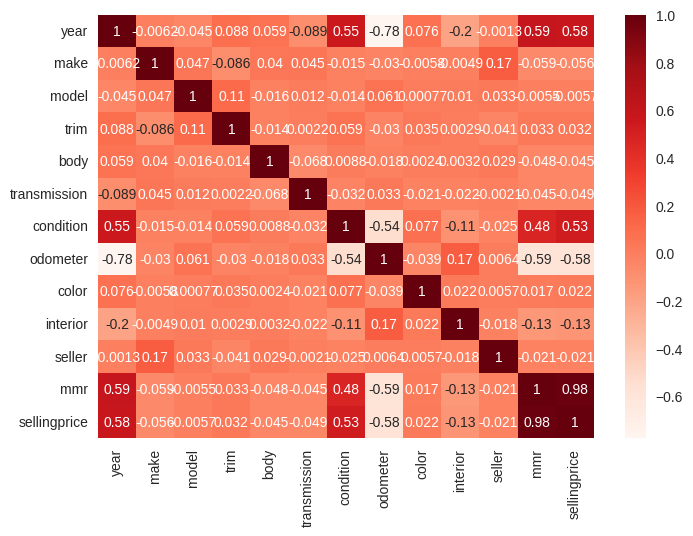

In [ ]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds');

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,166027.083955
1,theta_1,year,-84.214515
2,theta_2,make,1.278799
3,theta_3,model,-0.055748
4,theta_4,trim,-0.056978
5,theta_5,body,1.458487
6,theta_6,transmission,-311.518349
7,theta_7,condition,975.771064
8,theta_8,odometer,0.001776
9,theta_9,color,1.216329


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  1493.2535085999357
R^2 obtained is: 0.9758651380668963


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.